# Predict Bike-Sharing need in Metropolitan Area





Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
 - psych
 - reshape2
 - glmnet
 - gridExtra
 - lattice
 - MASS
 - caret
 - leaps
 - ggplot2

## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
* [Exploratory Data Analysis](#sec_3)
* [Methodology](#sec_4)
* [Model Development](#sec_5)
* [Results and discussion](#sec_6)
* [Conclusion](#sec_7)
* [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

 - "When in doubt Pedal it out" (Grace Cooley), This quotes helps to understand how important is riding a bike . In this task we will perform analysis on bike rental data to predict the demands for bike sharing based on  data such as Holiday, Functioning daya and season etc which is said to have impact on bike renting demands.We will be using some machine learning approaches where the motive is :<br><br>
1. To predict the bike sharing demands given the collected data<br>
2. To identify the major factors that affect the bike demand <br><br>
 
 - We have split the data set into two parts:<br>
1. traninig.csv <br>
2. test.csv <br><br>
 - The training dataset set constitutes of 80% of bike rental data whereas the test dataset consist of 20% of bike rental data.We will perform all the analysis and fit the multiple(mostly two) models on the training dataset, whereas perform the all the prediction on the test dataset, using the performance metrics we wan identify the model that fits best to the data <br>


The data set consist of 14 different columns with 8760 rows, Our main objective is to identify the variables that have strong effect on the model. We will also provide an inference using correlation analysis, regression equations, or any other statistical analysis.

Libraries used

In [1]:
install.packages('psych')
install.packages('reshape2')
install.packages('glmnet')
install.packages('gridExtra')
install.packages('lattice')
install.packages('MASS')
install.packages('caret')
install.packages('leaps')
install.packages('ggplot2')

Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lattice' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpWEYmZP\downloaded_packages


Installing package into 'C:/Users/HP/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message in download.file(url, destfile, method, mode = "wb", ...):
"downloaded length 1261568 != reported length 6259411"Warning message in unzip(zipname, exdir = dest):
"error 1 in extracting from zip file"Warning message in read.dcf(file.path(pkgname, "DESCRIPTION"), c("Package", "Type")):
"cannot open compressed file 'caret/DESCRIPTION', probable reason 'No such file or directory'"

ERROR: Error in read.dcf(file.path(pkgname, "DESCRIPTION"), c("Package", "Type")): cannot open the connection


In [3]:
library('psych')
library('reshape2')
library('glmnet')
library('gridExtra')
library('lattice')
library('MASS')
library('caret')
library('leaps')
library('ggplot2')

The data is divided into two parts train and test, we will load the train data first and after creating the model, we will use the test data to validate its accuracy.

In [4]:
#read the dataset
bike_train = read.csv("./train.csv")
bike_test = read.csv("./test.csv")
head(bike_train) 

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In this part the prominent task is to :<br>
1. Check the dimension os data<br>
2. Check if the data has negative and positive values<br>
3. Check for outliers and structure<br>
4. Check the correlation between variables<br>

<b>To find the above specifications about data we will use:</b><br>
Histograms<br>
Boxplots<br>
Correlation Matrix<br>
Other Statistical Analysis

In [5]:
#Dimension of data
dim(bike_train)

[1] 7008   14

There are 7008 rows and 14 columns

In [6]:
#structure of the dataset
str(bike_train)

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday              : Factor w/ 2 levels "Holiday"

There is no need to perform any imputation on data as there are no missing values

<b>Date</b> : year-month-day : Date the bike was rented<br>
<b>Rented Bike count </b>: Count of bikes rented at each hour, the response variable <br>
<b>Hour: </b>Hour of the day<br>
<b>Temperature:</b> Temperature in Celsius<br>
<b>Humidity:</b> in % : reffered as amount of water vapor in the atmosphere<br>
<b>Windspeed:</b> m/s : speed at which wind travel<br>
<b>Visibility:</b> 10m : Visibility refers to the distance with one can view from his/her current position<br>
<b>Dew point temperature: It refers to the state where the air cannot hold water in the gas form</b> Celsius<br>
<b>Solar radiation:</b> MJ/m2 : It refers to amount of radiation emitted from the sun<br>
<b>Rainfall:</b> mm : Amount of rain<br>
<b>Snowfall:</b> cm Amount of snow<br>
<b>Seasons:</b> Winter, Spring, Summer, Autumn<br>
<b>Holiday:</b> Holiday/No holiday, indicating if the corresponding date is a public holiday or not<br>
<b>Functional Day:</b> NoFunc(Non Functional Hours), Fun(Functional hours), the variable indicates the days when the rental bike system does not operate.<br>


To gain more descriptive analysis about the data we will use the summary function which provides the minimum,maximum, range,mean,median and quantiles for each variable

In [7]:
summary(bike_train)

       Date      Rented.Bike.Count      Hour        Temperature    
 30/7/18 :  24   Min.   :   0.0    Min.   : 0.00   Min.   :-17.50  
 10/11/18:  23   1st Qu.: 188.0    1st Qu.: 5.75   1st Qu.:  3.40  
 18/11/18:  23   Median : 503.0    Median :11.00   Median : 13.60  
 19/8/18 :  23   Mean   : 703.2    Mean   :11.46   Mean   : 12.83  
 20/1/18 :  23   3rd Qu.:1063.0    3rd Qu.:17.00   3rd Qu.: 22.50  
 21/4/18 :  23   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
 (Other) :6869                                                     
    Humidity       Wind.speed     Visibility     Dew.point.temperature
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700      
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000      
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029      
 3rd Qu.:74.00   3rd Qu.:2.30   3rd Qu.:2000.0   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.40 

There is a function named describe() like summary () which provides detailed statistics with trimmed, standard deviation,mad along with mean, median, min max and range for each variable.

In [8]:
# Using describe() function of psych package for detailed statistics 

describe(bike_train)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,7008,1.834553e+02,105.3428337,183.00,183.4010342,134.916600,1.0,365.00,364.00,0.004619210,-1.2003524,1.258368823
Rented.Bike.Count,2,7008,7.031507e+02,645.8735688,503.00,610.7701498,557.457600,0.0,3556.00,3556.00,1.137743519,0.7530395,7.715258214
Hour,3,7008,1.145719e+01,6.9070482,11.00,11.4450785,8.895600,0.0,23.00,23.00,0.013724353,-1.1949665,0.082507883
Temperature,4,7008,1.283255e+01,11.9399081,13.60,13.1350571,13.936440,-17.5,39.40,56.90,-0.192114316,-0.8543869,0.142627719
Humidity,5,7008,5.824814e+01,20.3581093,57.00,58.0590228,23.721600,0.0,98.00,98.00,0.051720403,-0.8069678,0.243187023
Wind.speed,6,7008,1.719792e+00,1.0333628,1.50,1.6234308,1.037820,0.0,7.40,7.40,0.892723012,0.7234307,0.012343996
Visibility,7,7008,1.435980e+03,608.6228340,1693.00,1508.5747147,455.158200,27.0,2000.00,1973.00,-0.704075180,-0.9555422,7.270280974
Dew.point.temperature,8,7008,4.029224e+00,13.0471466,5.00,4.7072040,14.529480,-30.6,26.80,57.40,-0.363009679,-0.7621928,0.155854195
Solar.Radiation,9,7008,5.710845e-01,0.8718680,0.01,0.3857917,0.014826,0.0,3.52,3.52,1.499378368,1.0997872,0.010414866


1. The Rented Bike Count has the highest standard deviation with 645.87 followed by Visibility with 608.62 <br>
Moreover, the standard error of Visibility is 7.27 which is highest whereas the standard error of Rented Bike Count is 7.715,<br>
2. The interesting statistics to notice is Rented Bike count has the maximum range which states that there were days when no bikes were rented however, on a particular day there were 3556 bikes were used for commute.<br>
3. The minimum value of hour is 0.0 which 12 am where the maximum is 23.00 which 11pm or 23:00, this resembles that the bikes were available for renting 24*7.<br>
4. The min value of temperature is -17.5 degrees and maximum values is 39.5 degrees which clearly states that the temperature in this area varies drastically sometimes it is very cold whereas sometimes it is hot with an average of 13.93<br>
5. The maximum value for Humidity is 98% <br>
6. Humidity is related to Dew Point Temperature, the maximum value is 26.80 degree Celcius which around 75 F and anything i.e 75 F or above , the air really feels sticky and humid, there are times when the dew point temperature is in negative.
7. The median value of Rainfall is 0 whereas the maximum value is 35, The other intersting fact to notice is that this variable has highest positive skewness According to (Howard Perlman, 2020), Heavy shower are when it rains Greater than 10 mm per hour, but less than 50 mm per hour, which means sometimes it rains heavily whereas sometimes it does not rain at all.<br>
8. Similarly, the range of snowfall is 0 to 8.80 which means that there is not much snow in this area.The data is positively skewed.<br>
9. The maximum wind speed is 7.40 km/hr.<br>
10. Solar radiation is recorded as a MJ/m2.There is not much of solar radiation as the range is mere 3.52.<br>
11. The range of season is 3 where the minimum value is 1 and maximum is 4, it means that there are more seasons i.e Autumn,Spring, Summer and Winter<br>
12. The range of date is 364 which means tthe bikes are rented for entire year.<br>


## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>
Now, we will visually analyse each variable using Boxplots

Using Date, Seasons, Holiday, Functioning.Day as id variables


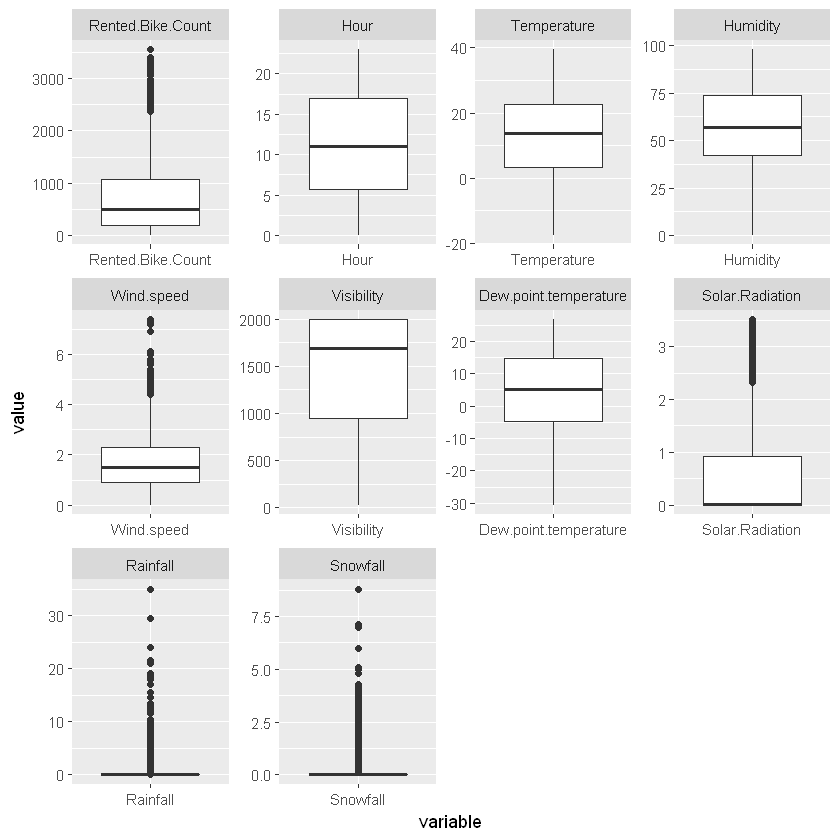

In [9]:
# bike_train$
analysis_plot <- melt(as.data.frame(bike_train[,-15]))  # melt function of reshape library helps to combine multiple columns into single stack

#generates graphs
ggplot(analysis_plot,aes(x = variable,y = value)) +

#provides graphs in different frames
facet_wrap(~variable, scales="free") + 
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

There are outliers for variables like Rainfall, Snowfall, Wind Speed, Solar Radiation,Rented Bike Count. Moreover we do not have boxplots for variables like Date, Holidays, Functioning.Day and Seasons as they are of factor type<br>
So for that we will convert these variables to numeric


In [10]:
bike_train1<-bike_train


In [11]:
# #converting format variables to numeric
bike_train3<-bike_train

bike_train3$Date <- as.numeric(bike_train3$Date)
bike_train3$Seasons <- as.numeric(bike_train3$Seasons)
bike_train3$Holiday <- as.numeric(bike_train3$Holiday)
bike_train3$Functioning.Day <- as.numeric(bike_train3$Functioning.Day )



No id variables; using all as measure variables


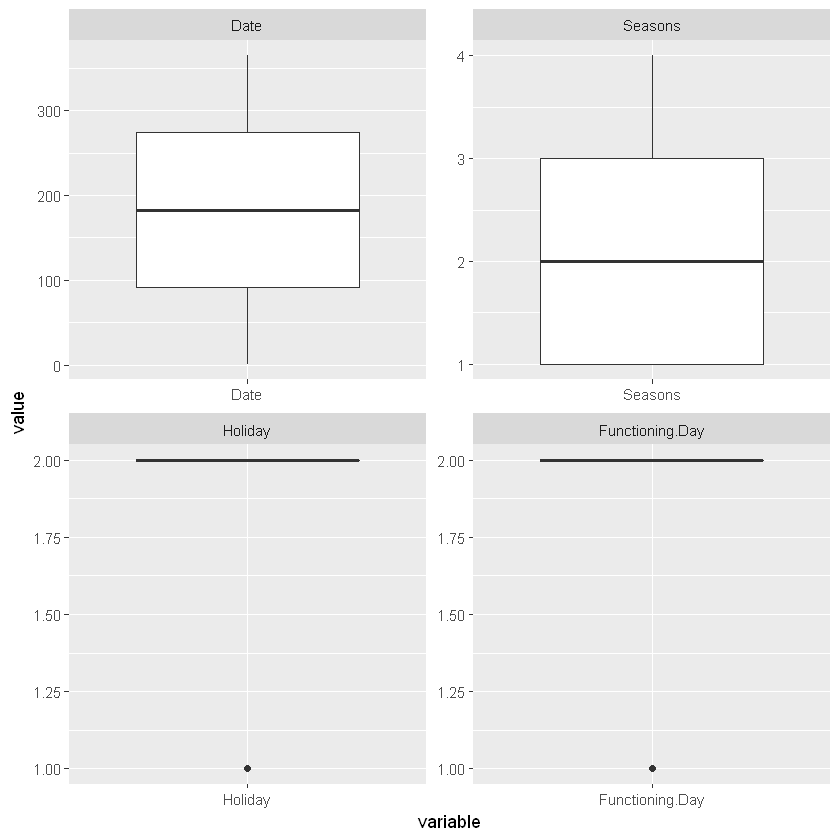

In [12]:
analysis_plot2 <- melt(as.data.frame(bike_train3[,c(1,12,13,14)]))
ggplot(analysis_plot2,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") + #graph all variables on an adjusted scale
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

There are no outliers for Date and Season variables, however for Holiday there are two values i.e 1 and 2 where most of the data is inclined towards 2(Non-Holidays), Similarly for Functioning Day the data is inclined towards 2(Yes/Functioning.Day)

<b>This clearly states that the bikes were mostly rented on non- Holidays and on Functioning.Days</b>

We will use histograms to see more details of the dataset

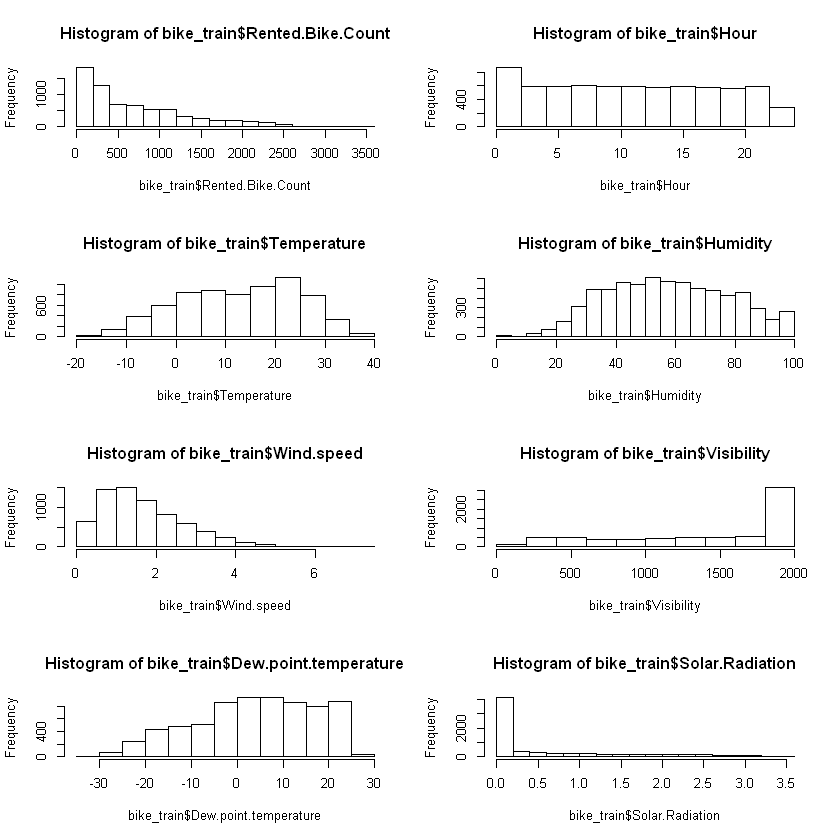

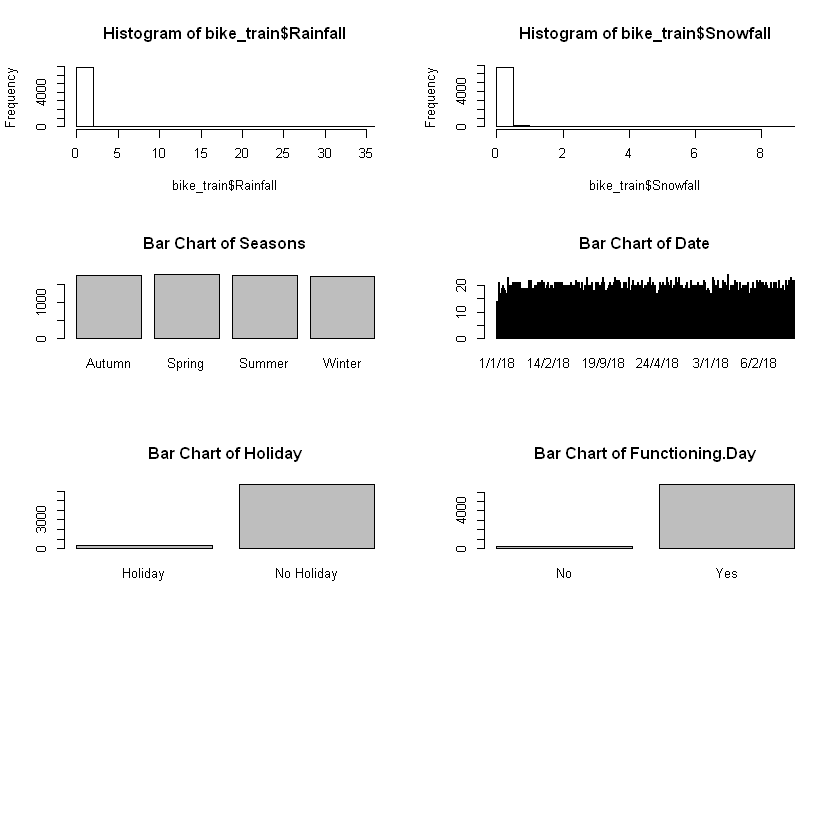

In [13]:
par(mfrow = c(4,2))
hist(bike_train$Rented.Bike.Count)
hist(bike_train$Hour)
hist(bike_train$Temperature)
hist(bike_train$Humidity)
hist(bike_train$Wind.speed)
hist(bike_train$Visibility)
hist(bike_train$Dew.point.temperature)
hist(bike_train$Solar.Radiation)
hist(bike_train$Rainfall)
hist(bike_train$Snowfall)


plot(as.factor(bike_train$Seasons),main="Bar Chart of Seasons") 
plot(as.factor(bike_train$Date),main="Bar Chart of Date")
plot(as.factor(bike_train$Holiday), main="Bar Chart of Holiday")
plot(as.factor(bike_train$Functioning.Day), main="Bar Chart of Functioning.Day")


1. As from the above observations we can see that the data is Holiday , VIsibility and Functioning Day are negatively skewed
this means bikes are mostly rented on Non Holidays, Functioning Days where the visibility is around 2000<br>
2. Whereas, the variables like Rented Bike Count, Rainfall, Snowfall,Solar Radiation are positvely skewed <br>
Date and Seasons are equally distributed.<br>
3. The wind speed is mostly between 0 to 5m/s.<br>
4. The temperature ranges from -20 to 40 where temperature between 20 to 25 degree celsius is frequent.<br>
5. Similarly Dew Point Temperature is common between 0 to 10 degree Celsius, where as the humidity of 55 percent occurs more frequently.
6. Dew.Point.Temperature, Temperature and Humidity appears close to normally distributed.

As we can see that there are multiple variables have skewness in data, to reduce the skewness we will first apply log and sqrt to the variable to bring it in normally distibuted form


<h3> Rented Bike Count </h3>

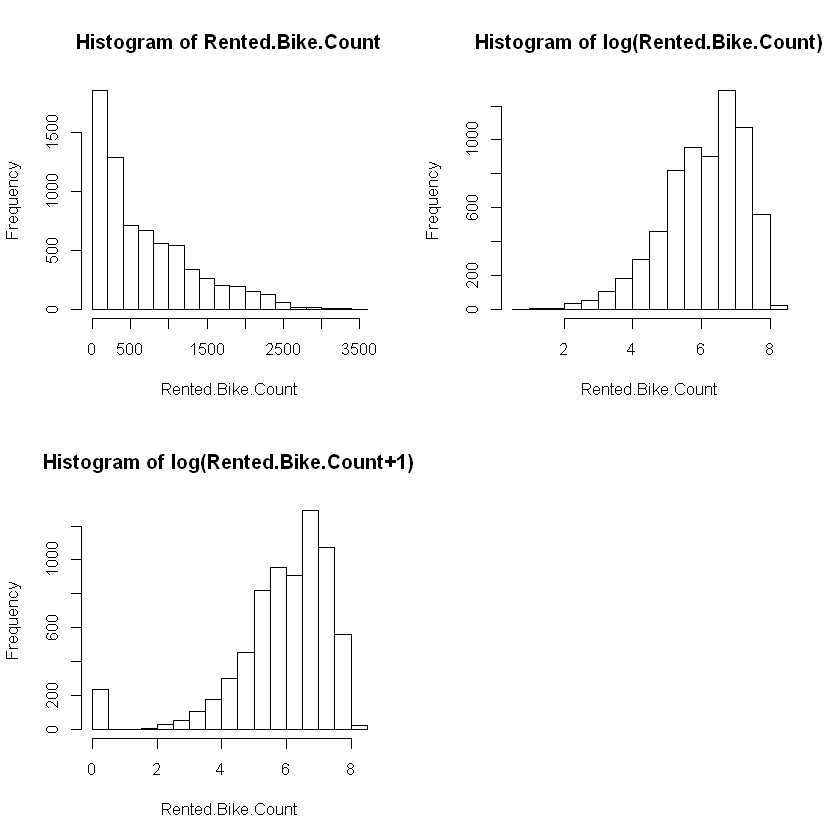

In [14]:
par(mfrow = c(2,2))
hist(bike_train$Rented.Bike.Count, xlab = "Rented.Bike.Count", main="Histogram of Rented.Bike.Count")
hist(log(bike_train$Rented.Bike.Count), xlab = "Rented.Bike.Count", main="Histogram of log(Rented.Bike.Count)")
hist(log(bike_train$Rented.Bike.Count+1), xlab = "Rented.Bike.Count", main="Histogram of log(Rented.Bike.Count+1)")


After applying log on Rented.Bike.Count variable the data appeared negatively skewed, I tried applying log+1 but the plot is close to normal distribution

<h3> Hour </h3>

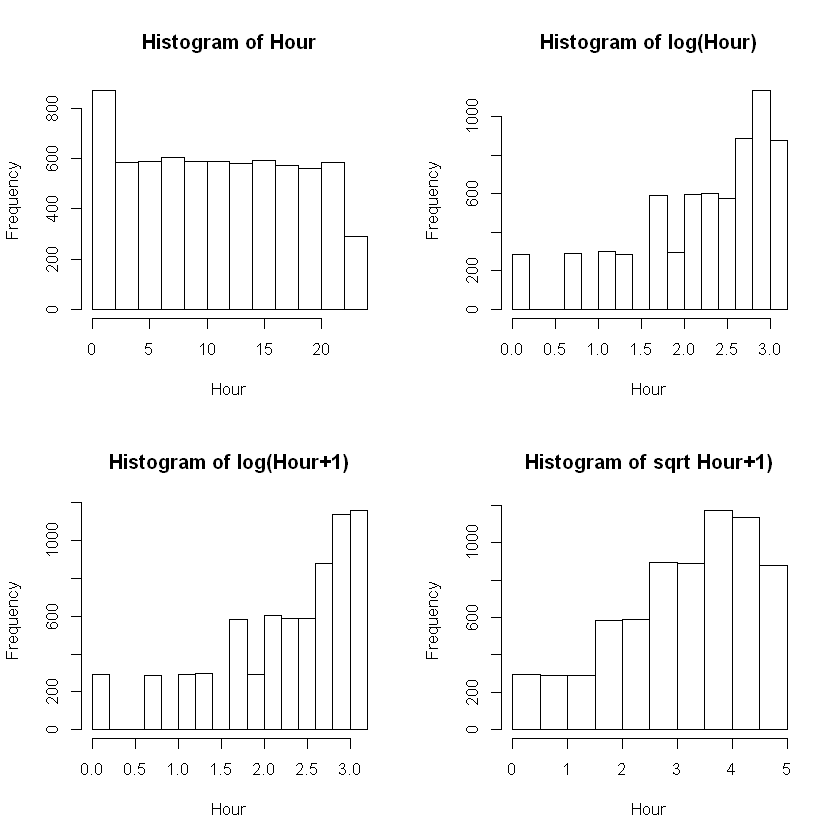

In [15]:
par(mfrow = c(2,2))
hist(bike_train$Hour, xlab = "Hour", main="Histogram of Hour")
hist(log(bike_train$Hour), xlab = "Hour", main="Histogram of log(Hour)")
hist(log(bike_train$Hour+1), xlab = "Hour", main="Histogram of log(Hour+1)")
hist(sqrt(bike_train$Hour), xlab = "Hour", main="Histogram of sqrt Hour+1)")

The histogram of Hour looked a bit absurd so I tried applying log, log+1 and sqrt on it. The sqrt form of the graph looks more convincing and normally distributed

<h3> Wind.Speed</h3>

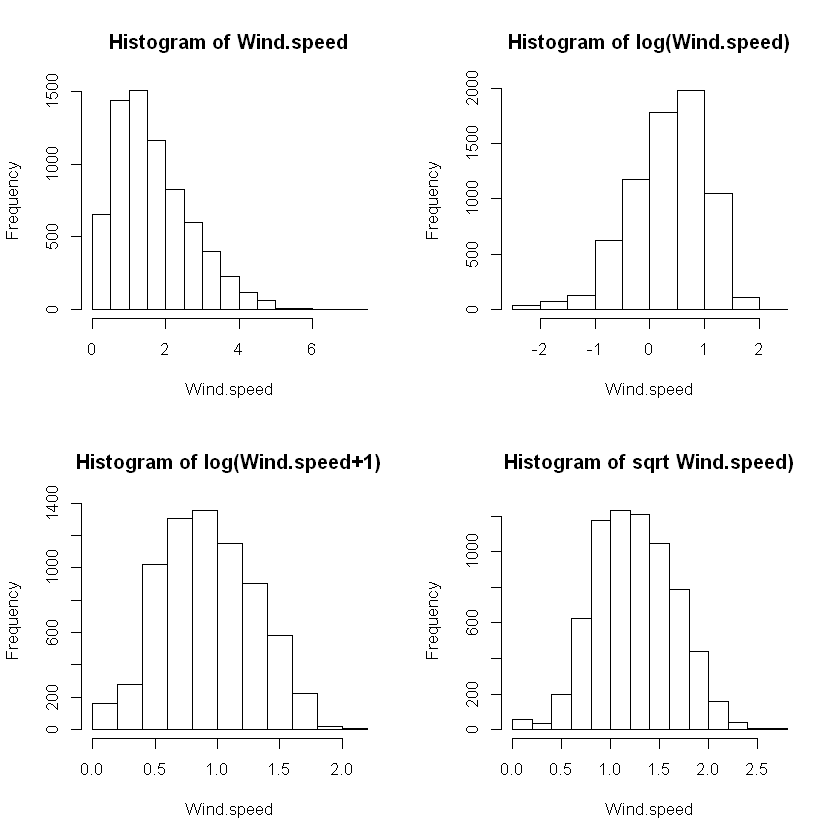

In [16]:
par(mfrow = c(2,2))
hist(bike_train$Wind.speed, xlab = "Wind.speed", main="Histogram of Wind.speed")
hist(log(bike_train$Wind.speed), xlab = "Wind.speed", main="Histogram of log(Wind.speed)")
hist(log(bike_train$Wind.speed+1), xlab = "Wind.speed", main="Histogram of log(Wind.speed+1)")
hist(sqrt(bike_train$Wind.speed), xlab = "Wind.speed", main="Histogram of sqrt Wind.speed)")

The log of Wind.Speed has a negative value in its log so we can look for log+1 as it looks to achieve normal distribution

<h3>Temperature</h3>

Warning message in log(bike_train$Temperature):
"NaNs produced"Warning message in log(bike_train$Temperature + 1):
"NaNs produced"Warning message in sqrt(bike_train$Temperature):
"NaNs produced"

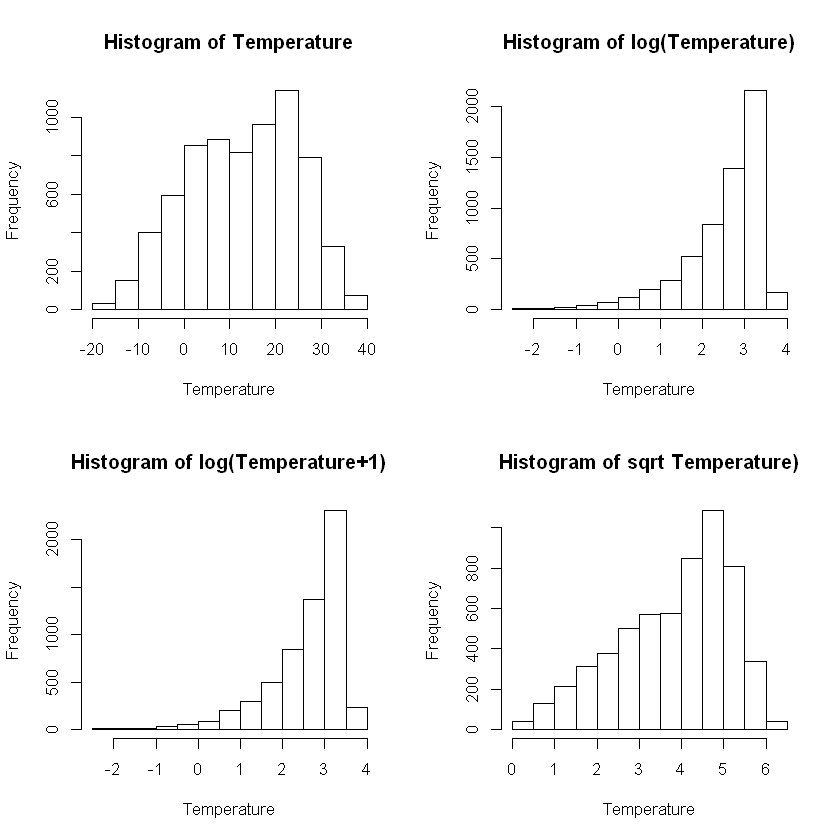

In [17]:
par(mfrow = c(2,2))
hist(bike_train$Temperature, xlab = "Temperature", main="Histogram of Temperature")
hist(log(bike_train$Temperature), xlab = "Temperature", main="Histogram of log(Temperature)")
hist(log(bike_train$Temperature+1), xlab = "Temperature", main="Histogram of log(Temperature+1)")
hist(sqrt(bike_train$Temperature), xlab = "Temperature", main="Histogram of sqrt Temperature)")

The histogram of the Temperature was not in normal distribution form this led me to apply different transformations like log(),log()+1 and  sqrt(). Here the original histogram had negative values when  I converted it into log() it still had those negative values. I tried log()+1, the scale was altered but the values were still negative. Eventually I applied sqrt where the  scale and value both changed.

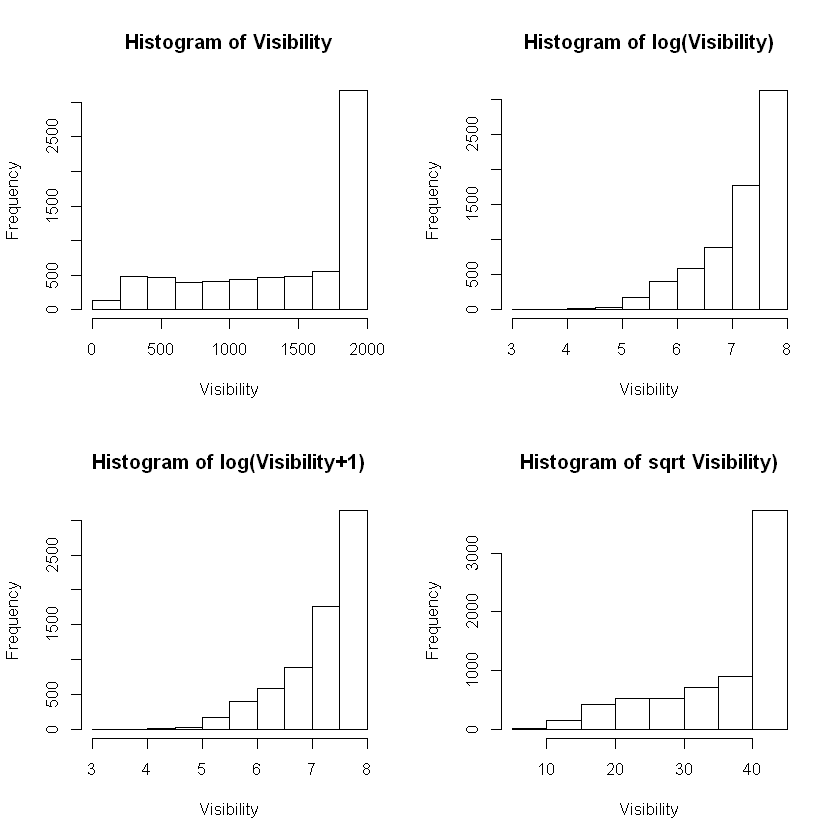

In [18]:

par(mfrow = c(2,2))
hist(bike_train$Visibility, xlab = "Visibility", main="Histogram of Visibility")
hist(log(bike_train$Visibility), xlab = "Visibility", main="Histogram of log(Visibility)")
hist(log(bike_train$Visibility+1), xlab = "Visibility", main="Histogram of log(Visibility+1)")
hist(sqrt(bike_train$Visibility), xlab = "Visibility", main="Histogram of sqrt Visibility)")

Initially, applying log to the Visibility variable did not change anything only the scale changed, Secondly I applied log+1 which looks exactly similar to log() and then finally I tried sqrt but unfortunately nothing changed much exept the scale. To recapitulate, even after performing so many transformations there is no improvement in the variable.

<h3> Solar.Radiation </h3>

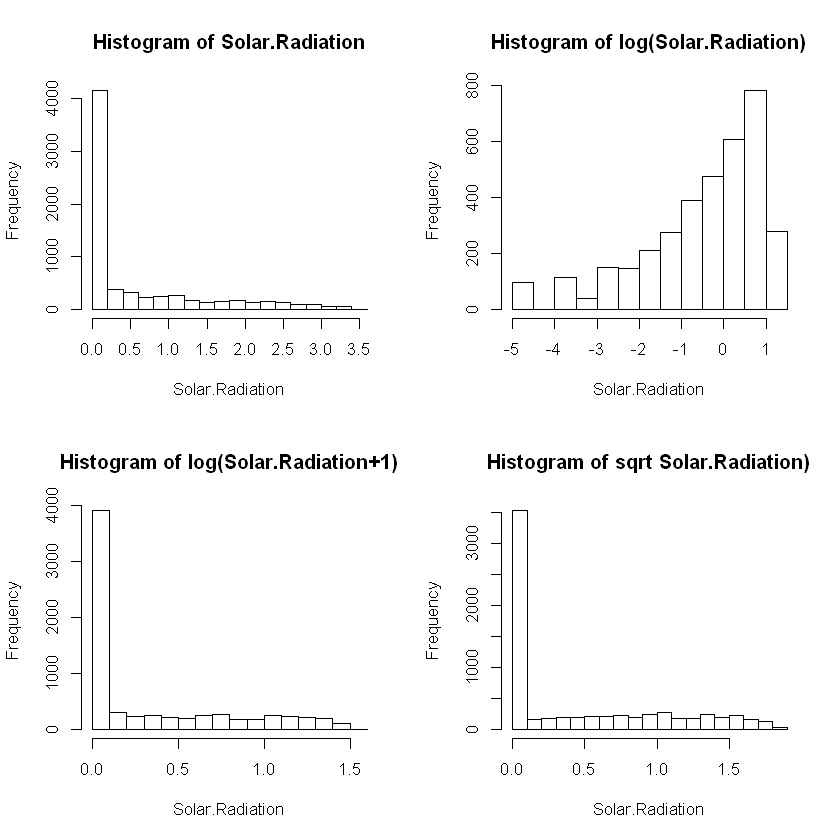

In [19]:
par(mfrow = c(2,2))
hist(bike_train$Solar.Radiation, xlab = "Solar.Radiation", main="Histogram of Solar.Radiation")
hist(log(bike_train$Solar.Radiation), xlab = "Solar.Radiation", main="Histogram of log(Solar.Radiation)")
hist(log(bike_train$Solar.Radiation+1), xlab = "Solar.Radiation", main="Histogram of log(Solar.Radiation+1)")
hist(sqrt(bike_train$Solar.Radiation), xlab = "Solar.Radiation", main="Histogram of sqrt Solar.Radiation)")

Initially, applying log to the Solar.Radiation variable gave normally distributed form ,However there are also some negative values which made me to try  log+1 which looks exactly similar to its original form which is not convincing at all, so eventually  I tried sqrt but unfortunately nothing changed much except the scale. To recapitulate, even after performing so many transformations there is no improvement in the variable.
<h2>Rainfall</h2>

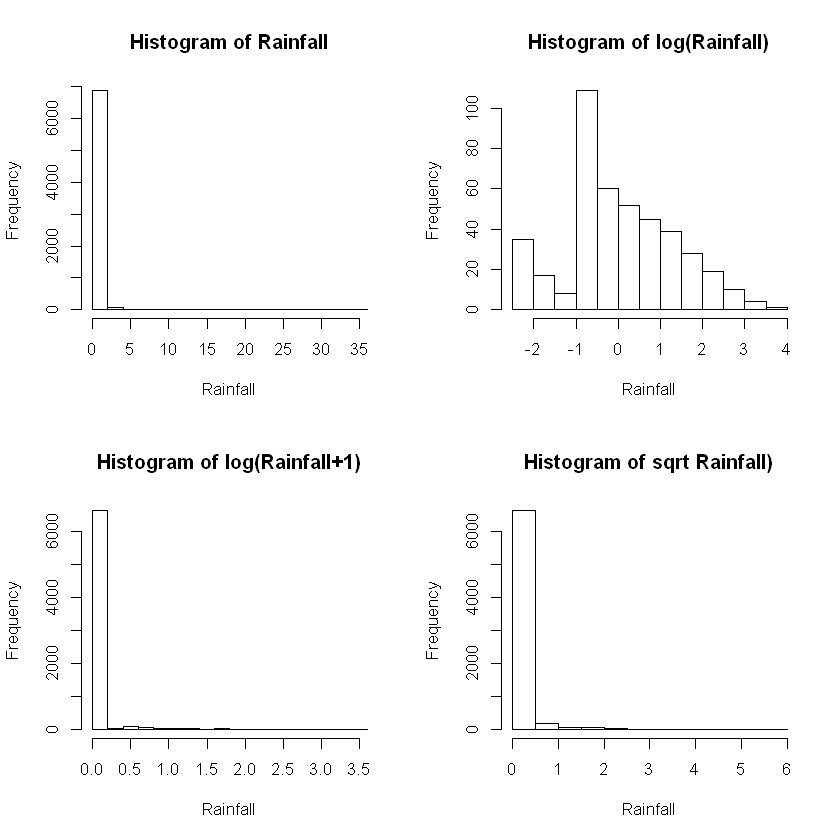

In [20]:
par(mfrow = c(2,2))
hist(bike_train$Rainfall, xlab = "Rainfall", main="Histogram of Rainfall")
hist(log(bike_train$Rainfall), xlab = "Rainfall", main="Histogram of log(Rainfall)")
hist(log(bike_train$Rainfall+1), xlab = "Rainfall", main="Histogram of log(Rainfall+1)")
hist(sqrt(bike_train$Rainfall), xlab = "Rainfall", main="Histogram of sqrt Rainfall)")

Similar to Visibility and Solar.Radiation, There is nothing much we can do on this variable

Similar to Rainfall variable, we cannot perform any more transformation on Snowfall

<h3>Correlation between variables</h3><br>
 - <b>Scatterplots</b><br>

In [21]:
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
## colorRamp() returns a function which takes as an argument a number
## on [0,1] and returns a color in the gradient in colorRange
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    ## because the func needs [0,1] and cor gives [-1,1], we need to shift and scale it
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    ## square it to avoid visual bias due to "area vs diameter"
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) # 50 is arbitrary
    x <- radius * cos(radians)
    y <- radius * sin(radians)
    ## make them full loops
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))


    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}
#adapted from tutorial week 3

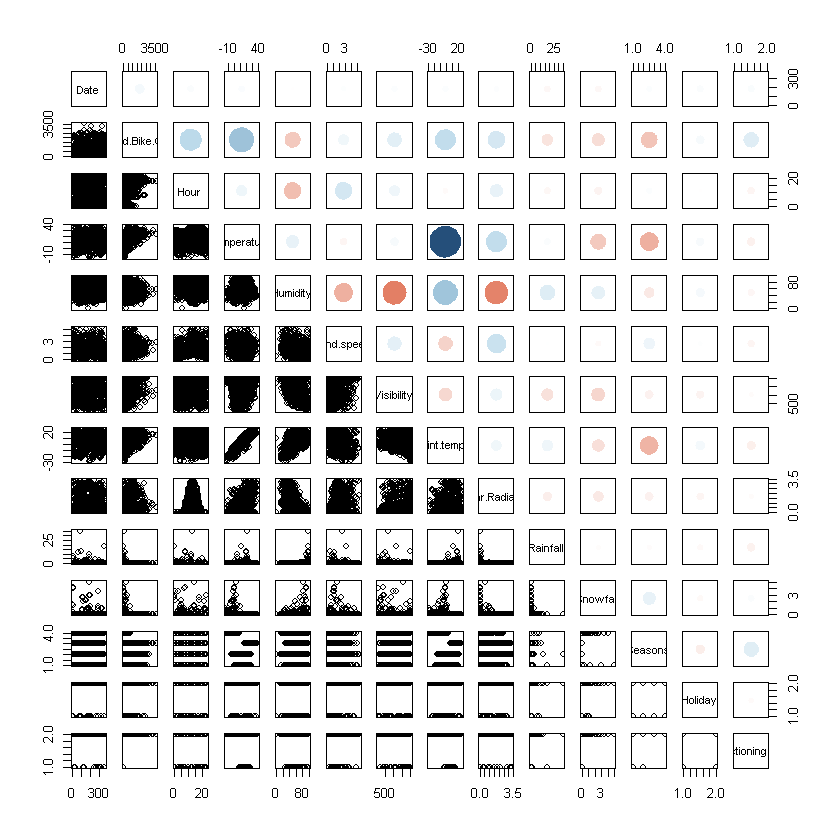

In [22]:
pairs(bike_train[sample.int(nrow(bike_train),1000),], upper.panel=panel.cor)

In the above figure the observations are:


The Blue bubble represent positive correlation whereas the red bubble represents negative correlation. <br>
There is a positive correlation between <b>Temperature and Dew.Point.Temperature</b> also the there is a moderate positive relation between <b>Temperature and Solar.Radiation</b>,<b> Humidity and Dew.Point.Temperature</b> and <b> Humidity and Rainfall</b>  .<br>
There is a strong <b>negative</b> correlation between <b>Humidity and Visibility</b>, <b>Humidity and Wind.Speed</b>, <b>Humidity and Solar.Radiation</b> whereas there is a moderate negative relation between Solar.Radiation.<br>

In [23]:
bike_train2<-bike_train


bike_train$Date <- as.numeric(bike_train$Date)
bike_train$Seasons <- as.numeric(bike_train$Seasons)
bike_train$Holiday <- as.numeric(bike_train$Holiday)
bike_train$Functioning.Day <- as.numeric(bike_train$Functioning.Day )


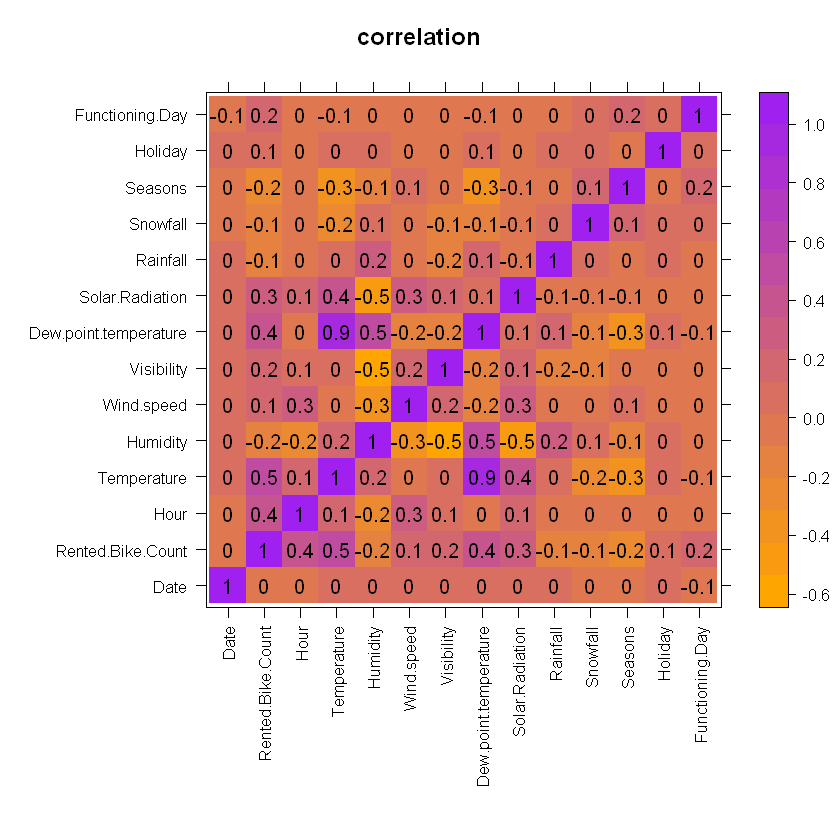

In [24]:
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 1))
}
#Define the color scheme
cols = colorRampPalette(c("orange","purple"))
#Plot the correlation matrix.
levelplot(cor(bike_train), col.regions = cols(100), main = "correlation", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

#adapted from tutorial week 3

## Correlation Matrix:
In this matrix the value ranges between 1 and -1, here the value closer 1 denotes positive relationship whereas value below 0 denotes negative correlation.
There is a positive correlation between Temperature and Dew.point.temperature as discussed above whereas there is also a positive relationship between Humidity and Dew.point.temperature, as occurence of Dew.point.temperaturedepends entirely on Humidity, there is also relationship between <b>Rented.Bike.Count and Temperature,  Rented.Bike.Count and Dew.point.temperature</b><br>

There is <b>negative</b> correlation between <b>Humidity and Visibility</b>, <b>Humidity and Solar.Radiation</b><br>
<b>Date, Holiday and Functioning</b>.
Date do not not have any corelation with other variables

Now, we will  check the linear relation between each variable.
using bike_train dataset as the data in this this variable has categorical values in factor format

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


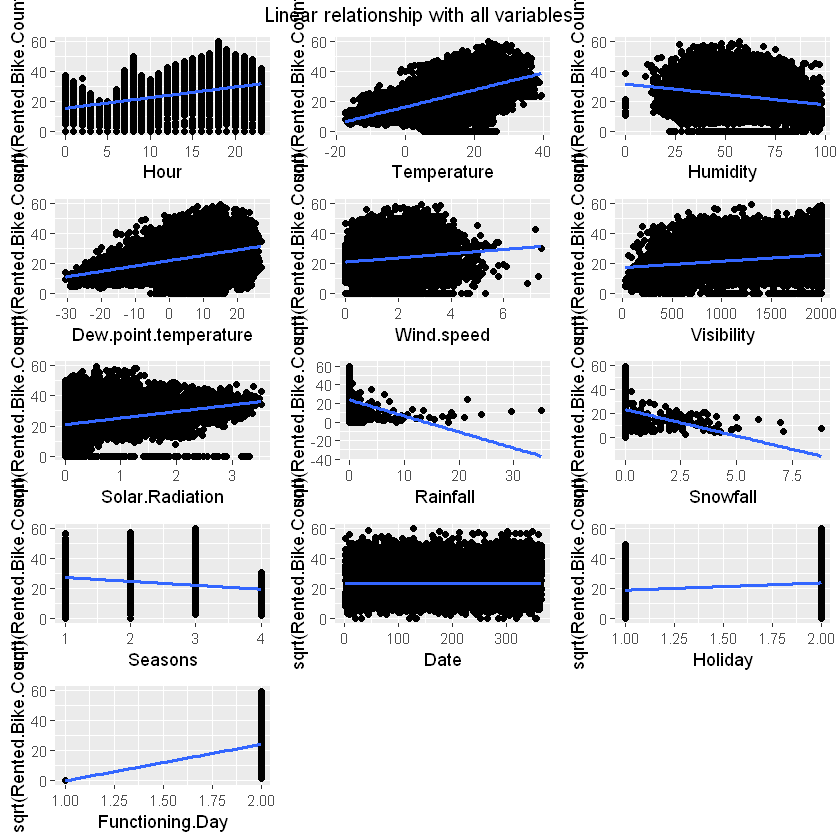

In [25]:
p1 <- ggplot(bike_train,aes(x = Hour, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p2 <- ggplot(bike_train,aes(x = Temperature, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p3 <- ggplot(bike_train,aes(x = Humidity, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p4 <- ggplot(bike_train,aes(x = Dew.point.temperature, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p5 <- ggplot(bike_train,aes(x = Wind.speed , y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p6 <- ggplot(bike_train,aes(x = Visibility, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p7 <- ggplot(bike_train,aes(x = Solar.Radiation, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p8 <- ggplot(bike_train,aes(x = Rainfall , y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p9 <- ggplot(bike_train,aes(x = Snowfall, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p10 <- ggplot(bike_train,aes(x = Seasons, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p11 <- ggplot(bike_train,aes(x = Date, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

p12 <- ggplot(bike_train,aes(x = Holiday, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)



p13 <- ggplot(bike_train,aes(x = Functioning.Day, y
= sqrt(Rented.Bike.Count))) + geom_point() + geom_smooth(method=lm, se=FALSE)

grid.arrange(p1, p2, p3, p4, p5, p6, p7,p8,p9,p10,p11,p12,p13,ncol=3, top="Linear relationship with all variables")

## Linear Relationship:

 - In linear relationship any change in independent variable will produce corresponding change in the dependent variable .<br>
 - There is a linear relationship between Temperature and Rental.Bike.Count, Rental.Bike.Count and dew.point.temperature, Rental.Bike.Count and Solar.Radation.<br> 
 - For the other variables there is a horizontal line which depicts no linear relatinship between variables.<br><br>

 - Whenever there is a change in temperature there will be a change in bike count, similarly when there will be a change in dew.point.temperature there will be change in Bike count as well.

 - Solar. Radiation and Humidity also show linear relationship with the target variable. This means change in solar radiation and humidity effect the rented bike count




Before creating the model we are extracting the month and year from the date column and then remove the Date column, as we saw above that it does not have any correlation with any of the variables<br>

In [26]:

bike_train1$Date<- as.Date(bike_train1$Date, format = "%d/%m/%Y")
bike_train1$month_year <- format(bike_train1$Date, "%B_20%y") # this will give output like "Sep"
bike_train<-bike_train1
bike_train

Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day,month_year
<date>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<chr>
0018-03-13,705,14,18.3,43,2.2,1509,5.4,2.43,0.0,0,Spring,No Holiday,Yes,March_2018
0018-03-15,289,14,12.1,97,2.0,177,11.6,0.20,0.0,0,Spring,No Holiday,Yes,March_2018
0018-11-29,126,5,1.8,34,0.9,1990,-12.4,0.00,0.0,0,Autumn,No Holiday,Yes,November_2018
0018-04-04,378,9,10.4,81,1.4,2000,7.2,0.36,0.0,0,Spring,No Holiday,Yes,April_2018
0018-02-15,236,17,2.4,17,3.1,1990,-20.2,0.78,0.0,0,Winter,Holiday,Yes,February_2018
0018-04-20,708,10,18.2,36,1.0,620,2.8,1.99,0.0,0,Spring,No Holiday,Yes,April_2018
0018-06-17,715,8,21.1,70,0.3,766,15.4,0.90,0.0,0,Summer,No Holiday,Yes,June_2018
0018-09-08,1001,1,18.9,55,2.3,2000,9.6,0.00,0.0,0,Autumn,No Holiday,Yes,September_2018
0018-03-25,502,20,10.7,70,2.8,236,5.4,0.00,0.0,0,Spring,No Holiday,Yes,March_2018


In [27]:
#drop the column Date
bike_train$Date<-NULL


In [28]:
#convert categorical values to factor
bike_train$month_year <- as.factor(bike_train$month_year)
bike_train$month_year <- as.numeric(bike_train$month_year)

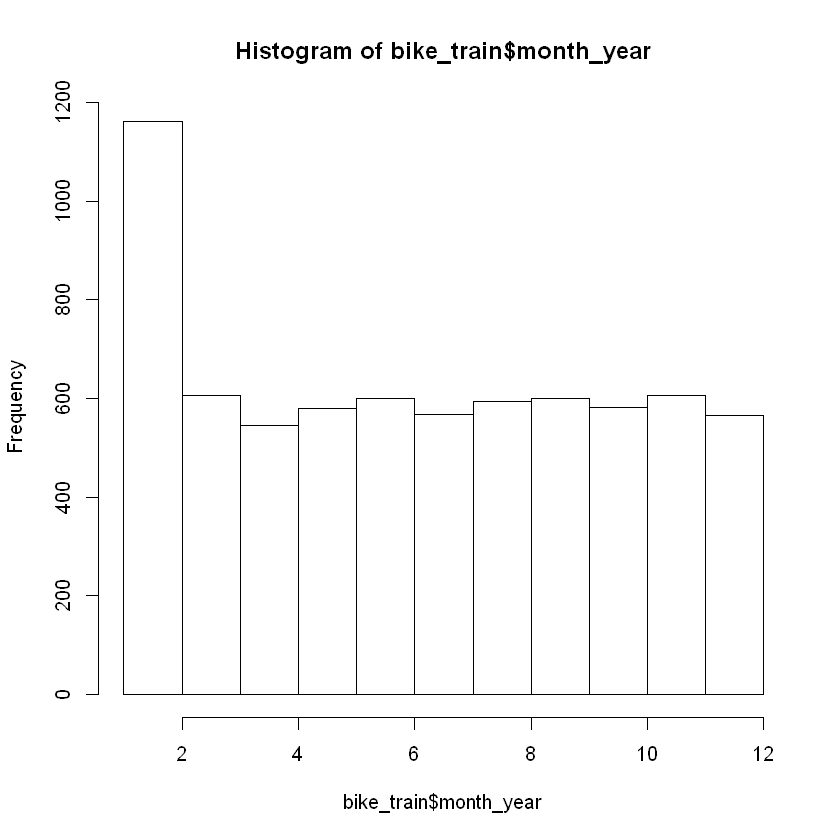

In [29]:
hist(bike_train$month_year)

We can see the count of rented bikes according to each month and year. We are taking this as a numeric type before fitting it into a model.

## 4. Methodology<a class="anchor" id="sec_4"></a>

For this task we will be using Regression for understanding the relationship between the variables using definitive set of statistical processes. We will be using different Linear Regression approaches for creating the model like :

 - Multiple Linear Regression Model<br>
 - Lasso Regression Model<br>
 
 We will follow run multiple iterations and use any many as varaiable to make sure The Model is accurate, As higher the number of variables higher is R^2 value. We will be verify the p value in case of multiple linear regression to find the most significant variable which rejects the null hypoothesis, whereas the lambda value with cross validation to shrink the co-efficients and find the most favourable variables. I will apply the correlations performed in the Exploratory Data Analysis part on model three to make it more accurate.
 
 

## 5. Model Development <a class="anchor" id="sec_5"></a>

<h3> Iteration 1:</h3>

Here I am plotting the the target variable with all the variables, where target variable is with a log +1  achieved  the normal distribution.  

In [30]:
fit_model_1 <- lm(log(Rented.Bike.Count+1) ~ ., data = bike_train)
summary(fit_model_1)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ ., data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8207 -0.3479  0.0684  0.4272  6.0885 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.943e-01  1.948e-01   4.078 4.59e-05 ***
Hour                   4.144e-02  1.390e-03  29.823  < 2e-16 ***
Temperature           -1.797e-02  6.887e-03  -2.610  0.00908 ** 
Humidity              -3.254e-02  1.930e-03 -16.857  < 2e-16 ***
Wind.speed            -7.065e-03  9.679e-03  -0.730  0.46545    
Visibility             1.034e-05  1.860e-05   0.556  0.57851    
Dew.point.temperature  6.300e-02  7.213e-03   8.734  < 2e-16 ***
Solar.Radiation       -6.065e-03  1.440e-02  -0.421  0.67355    
Rainfall              -2.006e-01  7.784e-03 -25.776  < 2e-16 ***
Snowfall              -7.644e-03  2.088e-02  -0.366  0.71431    
SeasonsSpring         -2.070e-01  3.309e-02  -6.256 4.17e-10 ***
SeasonsSummer         -1.329e-01  4.148e

The above statistics provides insights about how accurate the model is<br>

Residual standard error (RSE), R-squared (R2) and the F-statistic are metrics that are used to check how well the model fits to our data.<br>
Residual standard error provides standard error of residuals <br>
Multiple R-squared and Adj R-Squared provides the amount of variation in dependent variable. Higher the better (> 0.70)<br>
P-value tells about how significant the variable is whereas p-value < 2.2e-16 - so reject the null hypothesis <br>
F-statistic values- Higher the better<br>
Residual standard error (RSE)- Closer to zero the better<br>


1. From the above statistics we can see that variables Hour,Humidity,Dew.point.temperature,Rainfall,Seasons,Holiday,month_year and Functioning.Day has highest significance whereas Temperature and Snowfall has lowest significance<br>
2. The Multiple R-Squared is around 0.78.87 which is good (gretaer > 70)<br>
3. The Adjusted R-Squared is 0.7882 as well which tell us that the there is 0.72 variation<br>
4. F-statistics is 1740 which is good as well (Higher the better) with 6992 Degree of freedom.<br>

In [31]:
first_model<-step(fit_model_1)
summary(fit_model_1)

Start:  AIC=-4387.96
log(Rented.Bike.Count + 1) ~ Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Holiday + Functioning.Day + 
    month_year

                        Df Sum of Sq     RSS     AIC
- Snowfall               1       0.1  3729.9 -4389.8
- Solar.Radiation        1       0.1  3729.9 -4389.8
- Visibility             1       0.2  3729.9 -4389.7
- Wind.speed             1       0.3  3730.1 -4389.4
<none>                                3729.8 -4388.0
- Temperature            1       3.6  3733.4 -4383.1
- month_year             1      15.4  3745.2 -4361.0
- Dew.point.temperature  1      40.7  3770.5 -4313.9
- Holiday                1      44.0  3773.7 -4307.8
- Seasons                3     115.6  3845.4 -4180.1
- Humidity               1     151.6  3881.4 -4110.8
- Rainfall               1     354.4  4084.2 -3753.8
- Hour                   1     474.4  4204.2 -3550.8
- Functioning.Day    


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ ., data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8207 -0.3479  0.0684  0.4272  6.0885 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            7.943e-01  1.948e-01   4.078 4.59e-05 ***
Hour                   4.144e-02  1.390e-03  29.823  < 2e-16 ***
Temperature           -1.797e-02  6.887e-03  -2.610  0.00908 ** 
Humidity              -3.254e-02  1.930e-03 -16.857  < 2e-16 ***
Wind.speed            -7.065e-03  9.679e-03  -0.730  0.46545    
Visibility             1.034e-05  1.860e-05   0.556  0.57851    
Dew.point.temperature  6.300e-02  7.213e-03   8.734  < 2e-16 ***
Solar.Radiation       -6.065e-03  1.440e-02  -0.421  0.67355    
Rainfall              -2.006e-01  7.784e-03 -25.776  < 2e-16 ***
Snowfall              -7.644e-03  2.088e-02  -0.366  0.71431    
SeasonsSpring         -2.070e-01  3.309e-02  -6.256 4.17e-10 ***
SeasonsSummer         -1.329e-01  4.148e

After applying step function which is used to remove unwanted variables, the R-squared value is same but the F-Statistic value will increase with 2373 on 11 and 6996 DF

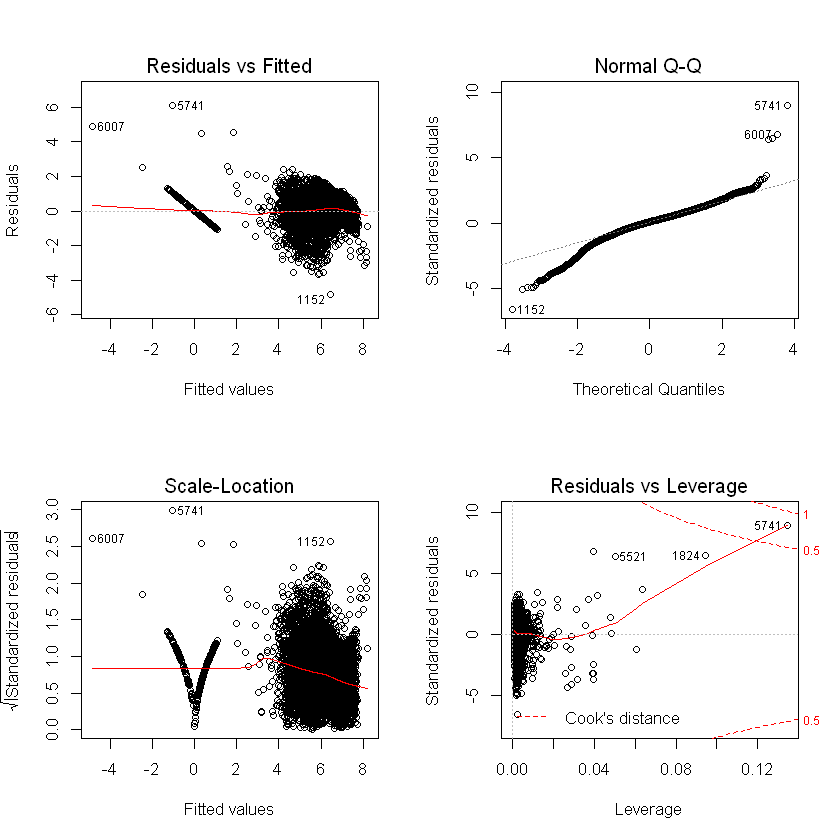

In [32]:
par(mfrow=c(2,2))
plot(fit_model_1)

The model plots represents:

<b>Residual vs Fitted</b> - It represent that the residuals are scattered evenly around 0 positvely and negatively and as the value increases the residuals are spread unevenly accross the plot.The model achieves heteroscedasticity.<br>
<b>Normal Q-Q </b>- the residuals follows  dashed line, however it deviates half way through indicating the residuals are not normally distributed.<br>
<b>Scale-Location</b> - The plot represents the model violates the assumption of equal variance<br>
<b>Residuals vs Leverage</b> - The plot represents there are some possibly  outliers, however they appear to cancel each other out<br>

<h3>Iteration 2</h3>


We will try to achieve higher accuracy with transformed variable extracted in EDA<br>
On trying to fit the model with required transformation like:<br>
sqrt(Hour) <br>
log(Rainfall+1)<br>
log(Wind.speed+1)<br>

- The following linear regression is:

In [33]:
fit_model_2 <- lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall+1) + Seasons + Holiday +
    month_year + Functioning.Day+ log(Wind.speed+1),
data = bike_train)
summary(fit_model_2)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1), data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4346 -0.3612  0.0617  0.4207  5.0676 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.101865   0.175061  -0.582 0.560665    
sqrt(Hour)             0.206359   0.007354  28.062  < 2e-16 ***
Temperature            0.002639   0.006262   0.421 0.673455    
Humidity              -0.023187   0.001795 -12.914  < 2e-16 ***
Dew.point.temperature  0.041532   0.006708   6.191 6.31e-10 ***
log(Rainfall + 1)     -1.316874   0.032292 -40.780  < 2e-16 ***
SeasonsSpring         -0.214404   0.030780  -6.966 3.57e-12 ***
SeasonsSummer         -0.153729   0.039603  -3.882 0.000105 ***
SeasonsWinter         -0.666293   0.043233 -15.412  < 2e-16 ***
HolidayNo Holi

From the summary of the model:
- The F-statistic of 2438 is significant.
- The $R^2$ value shows the model explains 80.7%, therefore using transformed data is allowing model to perform more accurately.
- The p-values of the coefficients show that sqft_lot is below the 0.05 significance level and so the null hypothesis (this variable does not help explain the variance) cannot be rejected.
- The Adjusted R-Squared is 80.6% as well which tell us that the there is 0.86 variation<br>
- F-statistics is 2438 which is good as well (Higher the better) with 6995 Degree of freedom.<br>



Applying backward step will remove the non-significant variables

In [34]:
second_model<-step(fit_model_2)
summary(second_model)

Start:  AIC=-5030.75
log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + Humidity + 
    Dew.point.temperature + log(Rainfall + 1) + Seasons + Holiday + 
    month_year + Functioning.Day + log(Wind.speed + 1)

                        Df Sum of Sq     RSS     AIC
- Temperature            1       0.1  3405.9 -5032.6
<none>                                3405.8 -5030.8
- log(Wind.speed + 1)    1       2.2  3408.0 -5028.2
- month_year             1      12.0  3417.8 -5008.1
- Dew.point.temperature  1      18.7  3424.5 -4994.5
- Holiday                1      43.5  3449.3 -4943.8
- Humidity               1      81.2  3487.0 -4867.6
- Seasons                3     123.2  3529.0 -4787.8
- sqrt(Hour)             1     383.4  3789.2 -4285.1
- log(Rainfall + 1)      1     809.7  4215.5 -3538.0
- Functioning.Day        1    9036.5 12442.3  4046.9

Step:  AIC=-5032.57
log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Humidity + Dew.point.temperature + 
    log(Rainfall + 1) + Seasons + Holiday + month_y


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Humidity + 
    Dew.point.temperature + log(Rainfall + 1) + Seasons + Holiday + 
    month_year + Functioning.Day + log(Wind.speed + 1), data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4333 -0.3604  0.0610  0.4199  5.0660 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.0377540  0.0866180  -0.436   0.6629    
sqrt(Hour)             0.2065855  0.0073336  28.170  < 2e-16 ***
Humidity              -0.0238981  0.0006146 -38.887  < 2e-16 ***
Dew.point.temperature  0.0442828  0.0015504  28.563  < 2e-16 ***
log(Rainfall + 1)     -1.3146183  0.0318432 -41.284  < 2e-16 ***
SeasonsSpring         -0.2147802  0.0307653  -6.981 3.19e-12 ***
SeasonsSummer         -0.1543663  0.0395715  -3.901 9.67e-05 ***
SeasonsWinter         -0.6689183  0.0427787 -15.637  < 2e-16 ***
HolidayNo Holiday      0.3677219  0.0388986   9.453  < 2e-16 ***
month_year             

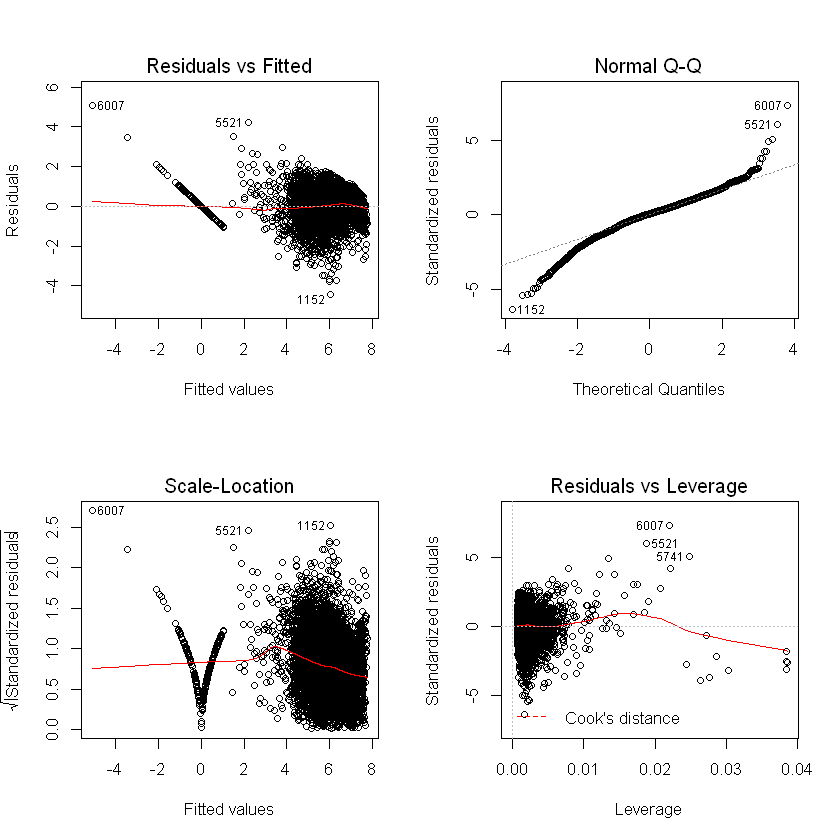

In [35]:
par(mfrow=c(2,2))
plot(fit_model_2)

The model plots represents:

<b>Residual vs Fitted</b> - It represents that the residuals are scattered evenly around 0 positvely and negatively, the values are scattered unevenly across the plot from the left.The model achieves heteroscedasticity.<br>
<b>Normal Q-Q </b>- the residuals deviates the dashed line initilally, however it gets back on the track indicating the residuals are normally distributed.<br>
<b>Scale-Location</b> - The plot represents the model violates the assumption of equal variance<br>
<b>Residuals vs Leverage</b> - The plot represents there are some possibly  outliers, however they appear to cancel each other out<br>

 <h3>Iteration 3</h3>
- In the third iteration we will be considering the correlations performed in the Exploratory Data Analysis part to make it more accurate:<br>
- Temperature:Dew.point.temperature<br>
- Dew.point.temperature:Humidity<br>
- Temperature:Solar.Radiation<br>
- Wind.speed:Solar.Radiation<br>
- Rainfall:Humidity<br> 
- Solar.Radiation:Humidity<br>
These correlations are derived from correlation matrix from above

In [36]:
model_fit3 <- lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1)+Temperature:Dew.point.temperature+Dew.point.temperature:Humidity+Temperature:Solar.Radiation+
              Wind.speed:Solar.Radiation+Rainfall:Humidity+ Solar.Radiation:Humidity, data = bike_train)
summary(model_fit3)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity, data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1007 -0.3450  0.0238  0.3933  3.3896 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.200e+00  1.991e-01  -6.027 1.76e-09 ***
sqrt(Hour)                         1.908e-01  7.081e-03  26.951  < 2e-16 ***
Temperature                        5.883e-02  7.644e-03   7.696 1.60e-14 ***
Humidity                          -1.253e-02  2.098e-03  -5.972 2.45e-09 ***
Dew.point.temperature              1.595e-02  7.412e-03   2.152   0.0314 *  
log(Rai

In [37]:
final<-step(model_fit3)
summary(final)

Start:  AIC=-5718.57
log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + Humidity + 
    Dew.point.temperature + log(Rainfall + 1) + Seasons + Holiday + 
    month_year + Functioning.Day + log(Wind.speed + 1) + Temperature:Dew.point.temperature + 
    Dew.point.temperature:Humidity + Temperature:Solar.Radiation + 
    Wind.speed:Solar.Radiation + Rainfall:Humidity + Solar.Radiation:Humidity

                                    Df Sum of Sq     RSS     AIC
<none>                                            3082.1 -5718.6
- Solar.Radiation:Wind.speed         1       2.5  3084.6 -5714.9
- log(Wind.speed + 1)                1       7.9  3090.1 -5702.5
- month_year                         1      12.6  3094.7 -5692.1
- Humidity:Dew.point.temperature     1      20.1  3102.3 -5674.9
- Temperature:Dew.point.temperature  1      22.0  3104.2 -5670.6
- Holiday                            1      47.3  3129.4 -5613.8
- Humidity:Solar.Radiation           1      59.0  3141.1 -5587.7
- Seasons       


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity, data = bike_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1007 -0.3450  0.0238  0.3933  3.3896 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.200e+00  1.991e-01  -6.027 1.76e-09 ***
sqrt(Hour)                         1.908e-01  7.081e-03  26.951  < 2e-16 ***
Temperature                        5.883e-02  7.644e-03   7.696 1.60e-14 ***
Humidity                          -1.253e-02  2.098e-03  -5.972 2.45e-09 ***
Dew.point.temperature              1.595e-02  7.412e-03   2.152   0.0314 *  
log(Rai

Here in the third iterations the iteractions between variables <b> Temperature:Dew.point.temperature,Temperature:Solar.Radiation,Humidity:Rainfall,Humidity:Solar.Radiation</b> have lower p values where as if we see the R squared it has increased significantly to 82.54% where as the F-Statistics has decreased to 1835 with 6989 Degree of freedom. <br>

To recapitulate, Correlations helped to increase the accuracy of the model.

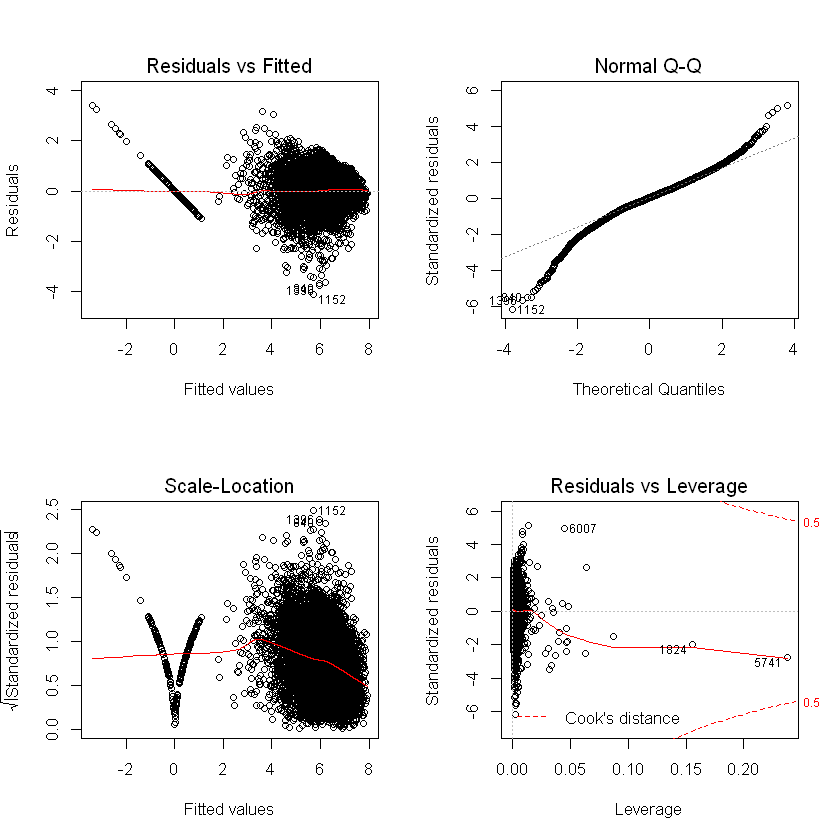

In [38]:
par(mfrow=c(2,2))
plot(model_fit3)

The model plots represents:

<b>Residual vs Fitted</b> - It represents that the residuals are scattered evenly around 0 positvely and negatively, the values are distributed unevenly. We can see some patterns accross the plot which makes model non-linear fits the data accurately.The model achieves heteroscedasticity.<br>
<b>Normal Q-Q </b>- The residuals deviates the dashed line initilally, however it gets back on the track indicating the residuals are normally distributed but it deviates again<br>
<b>Scale-Location</b> - The plot represents the model violates the assumption of equal variance<br>
<b>Residuals vs Leverage</b> - The plot represents there are some possibly  outliers, however they appear to cancel each other out<br>

<b>Here I am comparing the different iterations to get the best model</b>

In [39]:
anova(first_model,second_model,final)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6996,3730.563,NA,NA,NA,NA
2,6996,3405.901,0,324.6622,NA,NA
3,6989,3082.141,7,323.7592,104.8785,1.570458e-146


The RSS(Residual sum of squares ) value is the error between dataset and regression function. The lesser the error better the model. Hence from the statistics <b>model 3</b> has less error as compared to other models. Degree of Freedom is 7 which is more than other models.<br>
The model 3 consist of all the significant variables which helps to predict the accurate value.

<h3> Subset Selection</h3>

Subset selection provides the most favourable variables that can be used to fit in the model.  Here in this model variable Functioning.Day is considered as most optimal followed by log(Rainfall + 1 <br>
This subset selection helps to improve the R-squared value and RSS of the model.

In [40]:
#perform subset selection
subset_fit = regsubsets(log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity, data = bike_train, nvmax = 18) #set to 11 given

summary(subset_fit)
#adapted from week 6 tutorial task

Subset selection object
Call: regsubsets.formula(log(Rented.Bike.Count + 1) ~ sqrt(Hour) + 
    Temperature + Humidity + Dew.point.temperature + log(Rainfall + 
    1) + Seasons + Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity, data = bike_train, 
    nvmax = 18)
18 Variables  (and intercept)
                                  Forced in Forced out
sqrt(Hour)                            FALSE      FALSE
Temperature                           FALSE      FALSE
Humidity                              FALSE      FALSE
Dew.point.temperature                 FALSE      FALSE
log(Rainfall + 1)                     FALSE      FALSE
SeasonsSpring                         FALSE      FALSE
SeasonsSummer                         FALSE      FALSE
SeasonsWinter                         FALSE      FALSE
Holiday

We will be using AIC,BIC,R-Square and Cp for model evaluation and calculation<br>

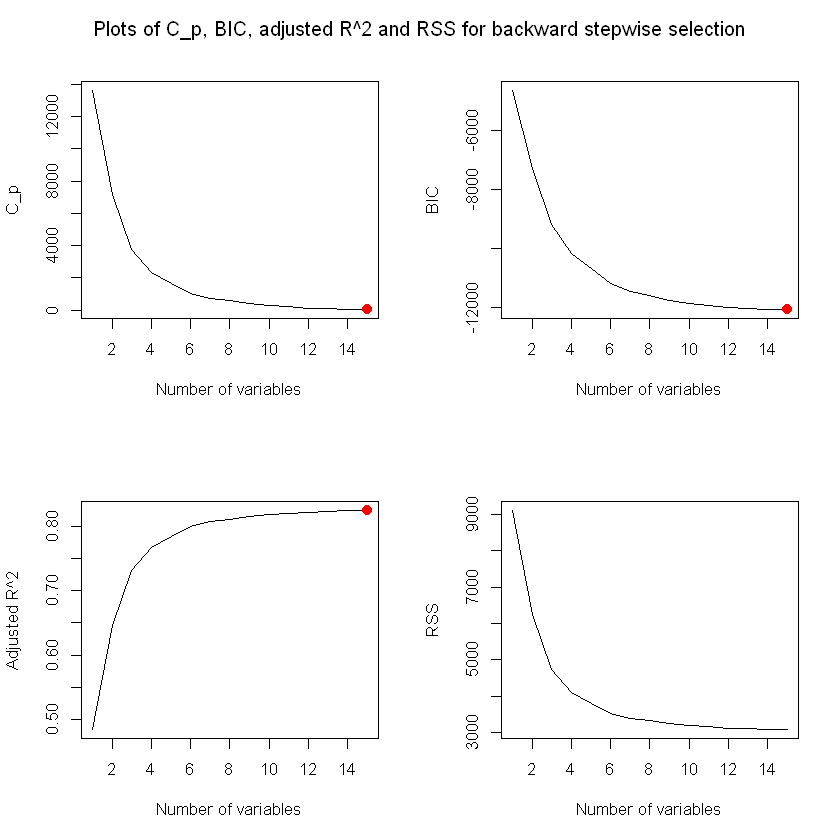

In [41]:
#plot graphs to find optimal number of variables
subset_fit = regsubsets(log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity,data = bike_train, nvmax = 15) #set to 11 given

reg_summary = summary(subset_fit)
par(mfrow = c(2, 2))
plot(reg_summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg_summary$cp), reg_summary$cp[which.min(reg_summary$cp)], col = "red", cex = 2, pch = 20)
plot(reg_summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg_summary$bic), reg_summary$bic[which.min(reg_summary$bic)], col = "red", cex = 2, pch = 20)
plot(reg_summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg_summary$adjr2), reg_summary$adjr2[which.max(reg_summary$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg_summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)
#adapted from week 6 tutorial task

AIC:- The basic idea of AIC is to penalize the inclusion of additional variables to a model. <br>
BIC:- BIC (or Bayesian information criteria) .<br>
Cp:- An advanced version of AIC used for reducing overfitting in the model.


From the Adjusted R^2 ,RSS and Cp plots above we can see that the optimal number of variables are 15. This can help in increasing R-squared value and reduce the standard error in the model. BIC is a variant of AIC with a stronger penalty for including additional variables to the model.BIC plot states that the optimal number of variables hsould be 14. 

#http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/#:~:text=AIC%20stands%20for%20(Akaike's%20Information,Statistician%2C%20Hirotugu%20Akaike%2C%201970.&text=BIC%20(or%20Bayesian%20information%20criteria,AIC%20developed%20by%20Colin%20Mallows.

<h3>Confidence Interval</h3>

Confidence Interval states that most of the variables should fall under 95 % interval.

In [42]:
confint(final, level = 0.95)

,2.5 %,97.5 %
(Intercept),-1.5897997302,-0.8093995696
sqrt(Hour),0.1769480531,0.2047085320
Temperature,0.0438423335,0.0738128419
Humidity,-0.0166436138,-0.0084177448
Dew.point.temperature,0.0014201798,0.0304812728
log(Rainfall + 1),-2.2285127886,-1.9873490792
SeasonsSpring,-0.2748812431,-0.1589054449
SeasonsSummer,-0.0418740173,0.1187251482
SeasonsWinter,-0.5895337904,-0.4219757632
HolidayNo Holiday,0.3115878943,0.4570915532


From the statistics above <b>log(Rainfall+1)</b> confidence interval is the largest, as lesser the value higher the range

In [43]:
#Extracting month and year from Date and dropping Date column for test dataset
bike_test$Date<- as.Date(bike_test$Date, format = "%d/%m/%Y")
bike_test$month_year <- format(bike_test$Date, "%B%y") # this will give output like march
bike_test$Date<-NULL


#https://stackoverflow.com/questions/42060370/how-can-i-extract-month-and-date-and-year-from-data-column-in-r

In [44]:
bike_test$month_year <- as.factor(bike_test$month_year)
bike_test$month_year <- as.numeric(bike_test$month_year)


Eventually we will compare our model on the test data to see how it performs, We will be using predict function

In [45]:
prediction <- predict(final, bike_test)


In [46]:
MSE_Linear<-mean((prediction-bike_test$Rented.Bike.Count)^2)
cat('MSE for Multiple Linear Regression is',log(MSE_Linear+1))

MSE for Multiple Linear Regression is 13.71752

Basically, MSE evaluates the quality of the predictor. The value should be non negative and near to zero. The value is 0.13 The adjusted R^2 value for the final model is 0.82 which states that the model is working fine with the significant variables.

<h3>2 .LASSO MODEL</h3>
Lasso(Least Absolute Shrinkage and Selection Operator) model is a type of linear regression model that uses shrinkage. Lasso is used for feature and predictor when standard linear regression cannot be used as it has large regression co-efficients.

In case of LASSO regression you estimate the coefficients with a slightly different approach:

Lasso uses the sum of the absolute coefficient values penalized by λ, so λ controls the amount of (L1) regulazation.


In lasso model initially I will use the variables extracted from the linear regression model.
#https://stats.stackexchange.com/questions/17251/what-is-the-lasso-in-regression-analysis

Data Loading:

In [47]:
#assign training and testing dataset
lasso_train <- bike_train
lasso_test <- bike_test

 Converting dataset into matrix as the model.matrix function produces a data matrix corresponding to the 14 variables

In [48]:
main <- model.matrix(log(Rented.Bike.Count + 1) ~ sqrt(Hour) + Temperature + 
    Humidity + Dew.point.temperature + log(Rainfall + 1) + Seasons + 
    Holiday + month_year + Functioning.Day + log(Wind.speed + 
    1) + Temperature:Dew.point.temperature + Dew.point.temperature:Humidity + 
    Temperature:Solar.Radiation + Wind.speed:Solar.Radiation + 
    Rainfall:Humidity + Solar.Radiation:Humidity,lasso_train)

In [49]:
#storing the target variable 

target_train <- lasso_train[, 1]

target_test <- lasso_test[, 1]

<h3>Iteration 1:</h3>

We will fit the model with cross validation using glmnet function 

In [50]:
 #use 1- lasso , 0-ridge
cv.lasso<- cv.glmnet(main, log(target_train+1), family="gaussian", alpha = 1) 
print(cv.lasso)


Call:  cv.glmnet(x = main, y = log(target_train + 1), family = "gaussian",      alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Measure       SE Nonzero
min 0.000855  0.4442 0.008240      18
1se 0.008753  0.4516 0.008405      16


lambda is extracted using cross validation, smaller the value of lambda better the accuracy of model, as the lambda value increases Lasso model starts eliminating those are value 0<br>
SE stands for standard error(similar to Linear Regression)

In [51]:
bestlam <- cv.lasso$lambda.min
bestlam

[1] 0.0008551999

Refitting the lasso model

In [52]:
lasso_refit<- glmnet(main, log(target_train+1), alpha = 1)
pred1<-predict(lasso_refit, s = bestlam, type = "coefficients")[1:16, ]
print(pred1)

                      (Intercept)                       (Intercept) 
                    -1.2553872315                      0.0000000000 
                       sqrt(Hour)                       Temperature 
                     0.1907956892                      0.0612115666 
                         Humidity             Dew.point.temperature 
                    -0.0117118233                      0.0111917835 
                log(Rainfall + 1)                     SeasonsSpring 
                    -2.1029631835                     -0.2141231315 
                    SeasonsSummer                     SeasonsWinter 
                     0.0297354776                     -0.5074891671 
                HolidayNo Holiday                        month_year 
                     0.3798349804                      0.0198495955 
               Functioning.DayYes               log(Wind.speed + 1) 
                     6.5297404824                      0.1094113705 
Temperature:Dew.point.temperature 

The model indicates that the coefficients of<b> Humidity, log(Rainfall + 1), Humidity:Dew.point.temperature</b> and Season have been shrunk to zero. Thus we are left with following variables, namely; <b>sqrt(Hour), Temperature,month_year,log(Wind.speed + 1),Humidity:Rainfall,sqrt(Solar.Radiation),Functioning.Day, Dew.point.temperature, SeasonSummer and Holiday</b>

<h3>Iteration 2:</h3>

In this we will try to find the most significant variables

In [53]:
main2 <- model.matrix(log(Rented.Bike.Count + 1) ~ sqrt(Hour)+ Temperature+
                      month_year+log(Wind.speed + 1)+
                      Humidity:Rainfall+sqrt(Solar.Radiation)+
                      Functioning.Day+ Dew.point.temperature+ Holiday, data=lasso_train)

In [54]:
#use 1- lasso , 0-ridge
cv.lasso_2<- cv.glmnet(main2, log(target_train+1), family="gaussian", alpha = 1) 
print(cv.lasso_2)



Call:  cv.glmnet(x = main2, y = log(target_train + 1), family = "gaussian",      alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Measure     SE Nonzero
min 0.001241  0.5970 0.0159       8
1se 0.020221  0.6109 0.0158       8


In [55]:
#gets the lambda value
bestlam1 <- cv.lasso_2$lambda.min
bestlam1

[1] 0.001240749

In [56]:
#try to refit the model
lasso_refit_2<- glmnet(main2, log(target_train+1), alpha = 1)
pred2<-predict(lasso_refit_2, s = bestlam1, type = "coefficients")[1:11, ]
print(pred2)

          (Intercept)           (Intercept)            sqrt(Hour) 
         -2.737418871           0.000000000           0.189285079 
          Temperature            month_year   log(Wind.speed + 1) 
          0.102589116           0.056636532           0.000000000 
sqrt(Solar.Radiation)    Functioning.DayYes Dew.point.temperature 
         -0.023700981           6.420336249          -0.053098053 
    HolidayNo Holiday     Humidity:Rainfall 
          0.411173060          -0.002288793 


After refitting the model we can see that variables sqrt(Hour), Temperature,FunctioningDay,month_year are the most significant variables

In [57]:
#calculate MSE ,RSS and R-Square
calc_res <- function(true, predicted, df) {
SSE <- sum((predicted - true)^2)
SST <- sum((true - mean(true))^2)
R_square <- 1 - SSE / SST
RMSE = sqrt(SSE/nrow(df))
# Model performance metrics
data.frame(
RMSE = RMSE,
MSE = (RMSE)^2,
Rsquare = R_square
) }
predictions_train <- predict(lasso_refit_2, s = bestlam, newx = main2)
calc_res(log(target_train+1), predictions_train, lasso_train)


#https://www.pluralsight.com/guides/linear-lasso-and-ridge-regression-with-r

RMSE,MSE,Rsquare
<dbl>,<dbl>,<dbl>
0.7700335,0.5929517,0.7645627


The R-Square value for Lasso model on training data is 76% 

In [58]:
MSE_Lasso<-mean((pred2-lasso_test$Rented.Bike.Count)^2)
cat('Mean Square Error of Lasso is', log(MSE_Lasso+1))

Warning message in pred2 - lasso_test$Rented.Bike.Count:
"longer object length is not a multiple of shorter object length"

Mean Square Error of Lasso is 13.72732

## 6. Results and discussion <a class="anchor" id="sec_6"></a>

We used two different approaches on the given dataset like Multiple Linear Regression and Lasso Regression model to predict the bike sharing demands. Our main objective was to create a model which has higher R=Squared value and lower Mean Square value, As the model with low Mean square value is considered as optimal, however the optimality does not solely rely on MSE or R-squared value it also depends on various other performance metrics.<br><br>

 - <h4>Multiple Linear Regression </h4>
 
     I. Multiple Linear Regression is the easiest and simplest of models when it comes to predicting, as it has lots of performance metrics to work with. A single command lm() with appropriate information can help in predicitng various insights.We looked into R^2 value, F-statistics, p-value,Adjusted R-Square value, RSE<br>
    2. I performed muliple linear regression in different iterations. <br> The main objective in Multiple Linear regression is to fetch the variables with smaller p-value, smaller the p-value higher the prediction, In the first iteration 9 out of 14 variables had lower p value, whereas in the second iteration, I used the transformed data as if the data is normally distributed the probability of model fitting the data increases. <br>
    3. There were 8 out of 10 variables that had the lowest p value, similarly in the third iteration we used correlation interactions to validate the lowest p value.Moreover the R Square increased as compared to previous iteration <br>
    4. We compared all the three models using anova method and came to conclusion that model 3(final) which had correlation was the optimal one on the basis of its RSS value.<br> 
    5. We also calculated the Cp, RSS, RSquared, BCI values along with subset selection on the (final) model<br>
    6. FInally we calculated the Mean Squared Error  for the Multiple Regression Model onm test data, The value for MSE was <b> 13.71</b>
    
    
 <h4> LASSO </h4>
 
 - I. Lasso is the advanced version of multiple linear regression model which can be used for reducing complexity and    minimising the variance. For lasso, we make use of cross validation to choose the right lambda to shrink our model in order to choose the optimal variables.<br>
    1. Our main objective is to reduce the value of mean squared error.<br>
    2. Initially we split the data into training and test datasets
    3. Converted the datasets into matrix
    4. Calculated the lambda value as it is the most prominent part of the Lasso Modelling
    5. We used the cross validation using lambda to find the optimal variables. 
    6. Refitted the data using optimal variables, we performed this couple of times to get the appropriate results.
    7. Eventually we performed Mean Squared Error for the Lasso Model on test data, The value for MSE was 
         <b>13.72</b>
     
   
   
     
     
     
<b> Hence if we see the MSE values of both the models the Multiple Linear Regression is slightly better than Lasso Model
    If we see the R-Squared of Multiple linear Regression model its 82.46% whereas the R-Squared Value of Lasso Model is around 77%. RSE(Residual Standard Error) is 0.6641 for Linear Regression model and 0.5971 for Lasso model. Whereas Lasso Model has generated least number of variables. In this case R-Squared plays a vital role for 
     
     
      

<h2>Subset Selection</h2>

For the multiple Linear Regression to predict Rented.Bike.Count 
1. Hour 
2. Humidity 
3. Rainfall 
4. Seasons 
5. Functioning.Day 
6. month_year 
7. Dew.point.temperature 
8. sqrt(Solar.Radiation)  
9. log(Rainfall + 1)  
10.  Dew.point.temperature:Humidity 
11. Dew.point.temperature:Temperature  
12. Temperature:Solar.Radiation 
13. Rainfall:Humidity




For Lasso :

1. Sqrt(Hour), 
2. FunctioningDay,
3. month_year, 
4. Temperature,






In <b>Multiple Linear Regression model</b> we have evaluated the variables on the basis of p value.<br> The lower the p value higher the significance of the variable. <br>The variables 
Dew.point.temperature:Humidity ,
Dew.point.temperature:Temperature,  Temperature:Solar.Radiation ,
Rainfall:Humidity,
Functioning.Day ,
had the lowest significant values whereas for the<b> Lasso Model</b> we used cross validation with lambda to shrink the model for evaluating the best parameters.<br>After performing couple of iterations with transformed and correlated data the four variables like Sqrt(Hour), FunctioningDay, month_year, Temperature remained whereas other shrinked to zero. <b>To recapitulate the variables Sqrt(Hour), FunctioningDay, month_year, Temperature are integral for predicitng the Rented.Bike.Count successfully.</b>



<h4>Inference based on model selection</h4>

 - If we see Bike rentals Count can be affected if it is not a Functioning Day that means the rental offices are closed whereas whenever the temperature is too high or too low people would not bother riding a bike.Similarly, time of day matters when it comes to renting a bike. The office hours are mostly 9am-5pm that can be the time when most people think of renting the bike whereas the month matters the most if its summer then more people would end up renting the bike but if its raining people would prefer to stay home.


## 7. Conclusion<a class="anchor" id="sec_7"></a>

1. In this task we used different machine learning approaches to predict the bike demands. We started with loading the data which was splited in test and training datasets,Firstly we performed Data Exploration by checking null values, structure and summary of Data. 
2. Secondly, we performed analysis on data by plotting Boxplots for each variable, we also plotted the histograms for each variable to know whether the data is skewed or not.<br>
If the variable is skewed, transformations were performed on the variable to bring it in normally distributed form.<br>
3. Thirdly, Model creation process started where we created the Linear Regression Model and performed three iterations with correlated and transformed data, Those models were evaluated on the basis of its performance metrics using anova function.The model with interactions and correlations between variable was optimal with MSE value of 13.71 and R-Square value of 82.46%.
Similarly another model was named lasso was created where we used the deviance and cross validation with lambda to get the most favourable variables.The R-Squared value of Lasso Model is 77 % and its MSE value is 13.72 which is slightly higher than the Linear Regression model, which makes<b> Linear Regression model more compatible and optimal over Lasso model</b>
4. However there is scope of improvement in the models where we can increase the accuracy of the model to fetch the value accurately 
5. The model could have been more accurate if there would have been more correlation between the variables. 
6. The variables Sqrt(Hour), FunctioningDay,month_year, Temperature are the most important for predicting Rented Bike.



## 8. References <a class="anchor" id="sec_8"></a>


1. Howard Perlman, U. (2020). Rainfall calculator, metric-How much water falls during a storm? USGS Water Science School. Retrieved 21 September 2020, from https://water.usgs.gov/edu/activity-howmuchrain-metric.html

2. Howard Perlman, U. (2020). Rainfall calculator, metric-How much water falls during a storm? USGS Water Science School. Retrieved 21 September 2020, from https://water.usgs.gov/edu/activity-howmuchrain-metric.html

3. https://stats.stackexchange.com/questions/17251/what-is-the-lasso-in-regression-analysis

4. R, h., & shekhar, s. (2020). how can i extract month and date and year from data column in R. Retrieved 25 September 2020, from https://stackoverflow.com/questions/42060370/how-can-i-extract-month-and-date-and-year-from-data-column-in-r

5. Action, D., Learning, M., & Example, Q. (2020). Quick Tutorial On LASSO Regression With Example | R Statistics Blog. Retrieved 25 September 2020, from https://rstatisticsblog.com/data-science-in-action/machine-learning/lasso-regression/
6. Linear Regression Summary(lm): Interpretting in R - Boostedml. (2020). Retrieved 25 September 2020, from https://boostedml.com/2019/06/linear-regression-in-r-interpreting-summarylm.html